# Jugurtha Kacimi Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

- Author: [Jugurtha Kacimi](https://github.com/jugurthakacimi/)
- Repository: [datafun-04-notebooks](https://github.com/jugurthakacimi/datafun-04-notebooks/)
- Purpose: Demonstrate a repeatable EDA workflow for a new, unexplored dataset
- Date: 2026-02-05

## Dataset Information

- Dataset: Seaborn Diamonds
- Description: Diamonds prices and attributes data
- Source: Seaborn
- Citation: Seaborn
- Access: Available via Seaborn's built-in datasets


## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [2]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data

This is a Markdown cell.

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [ ]:
# Load the diamonds dataset from Seaborn
# Into a pandas DataFrame (2D table)
diamonds_df: pd.DataFrame = sns.load_dataset("diamonds")

# Preview the first few rows
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [4]:
# Section 3 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = diamonds_df.shape

# Communicate the shape clearly
print(f"The diamonds dataset has {shape[0]} rows and {shape[1]} columns.")

The diamonds dataset has 53940 rows and 10 columns.


In [5]:
# Section 3 Python cell

# Display column names and data types
diamonds_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
# Section 3 Python cell

# List the column names
print("Column names:")
print(list(diamonds_df.columns))

Column names:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


In [8]:
# Section 4 Python cell

# Count missing values in each column
print("Missing values per column:")
print(diamonds_df.isnull().sum())

Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [9]:
# Section 4 Python cell

# Check for duplicate rows
num_duplicates = diamonds_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 146


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [10]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
diamonds_clean: pd.DataFrame = diamonds_df.dropna()

# Compare sizes
print(f"Original dataset: {len(diamonds_df)} rows")
print(f"Clean dataset: {len(diamonds_clean)} rows")
print(f"Rows removed: {len(diamonds_df) - len(diamonds_clean)}")

Original dataset: 53940 rows
Clean dataset: 53940 rows
Rows removed: 0


## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [ ]:
# Section 6 Python cell

# Summary statistics for numeric columns
diamonds_clean.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
mean_price = np.mean(diamonds_clean["price"])
std_price = np.std(diamonds_clean["price"])
min_price = np.min(diamonds_clean["price"])
max_price = np.max(diamonds_clean["price"])
range_price = np.ptp(diamonds_clean["price"])  # peak to peak (max - min)

print("Price Statistics (using numpy):")
print(f"  Mean: ${mean_price:.2f}")
print(f"  Std Dev: ${std_price:.2f}")
print(f"  Min: ${min_price:.2f}")
print(f"  Max: ${max_price:.2f}")
print(f"  Range: ${range_price:.2f}")

Price Statistics (using numpy):
  Mean: $3932.80
  Std Dev: $3989.40
  Min: $326.00
  Max: $18823.00
  Range: $18497.00


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [15]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = diamonds_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


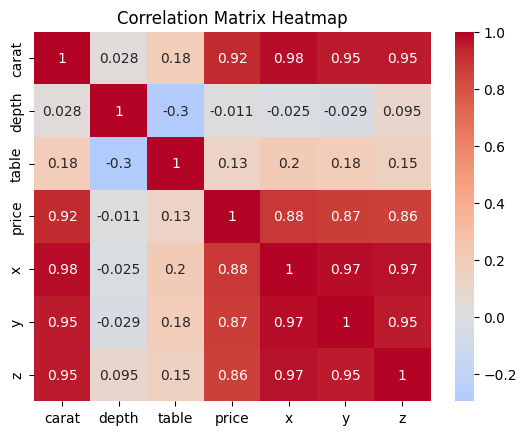

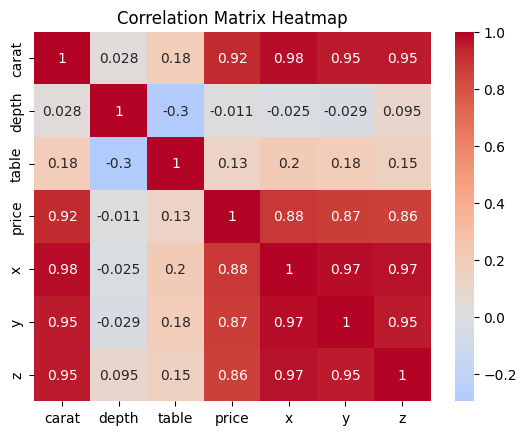

In [16]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


Use Markdown cells to narrate and tell the story as you explore.

Interpretation:

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

From this heatmap, we can see that **flipper_length_mm** and **body_mass_g** show strong positive correlation (~0.87).

This is a Markdown cell.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

Text(0.5, 1.0, 'Chart 1. Carat vs. Price (by Cut)')

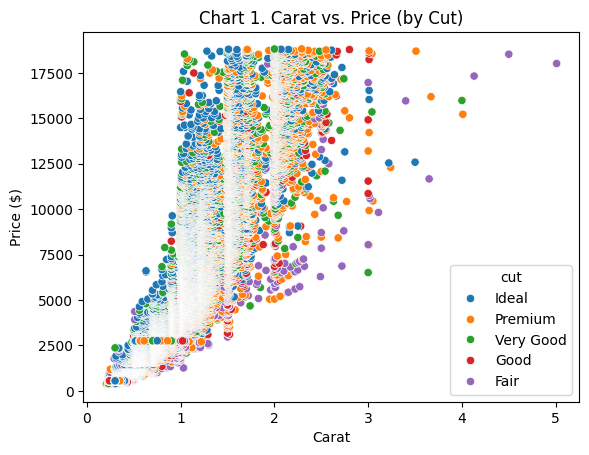

In [33]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot of diamond carat vs. price
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=diamonds_clean, x="carat", y="price", hue="cut",
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Carat")
scatter_plt.set_ylabel("Price ($)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Carat vs. Price (by Cut)")

# Run by clicking Run All in the Menu up top

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
